<a href="https://colab.research.google.com/github/kbatbouta/Senior/blob/master/FaceGenV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTANT NOTE:
**PLEASE add **this file to your drive (  [ACelab Data Set](https://drive.google.com/open?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM) ) and ([ACeleb Annotations](https://drive.google.com/drive/folders/0B7EVK8r0v71pOC0wOVZlQnFfaGs)).

**Refernces:**
1.   ACeleb, [DATASET HOME PAGE ](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html).
2.   Cascade Classifier Pretrained Models, [OpenCV repo.](https://github.com/opencv/opencv/tree/master/data/haarcascades)




In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 21.2MB/s 
Uploaded file with ID 1uFz3UB-7R96bcRJbpqCm0UaeViFdyIyJ


In [0]:
drive.mount('/gdrive', force_remount=True)

import os
from os import path, listdir
from os.path import join as appdir

import IPython

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

if 'db' not in listdir('/content'):
    !pip install jupyter_contrib_nbextensions
    !jupyter contrib nbextension install --user
    !jupyter nbextension enable hinterland/hinterland
    
    !unzip -q -o /gdrive/My\ Drive/img_align_celeba.zip -d /content/db 
    
    !wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalcatface.xml
    !wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalcatface_extended.xml
    !wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_profileface.xml
    !wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_righteye_2splits.xml
    !wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_lefteye_2splits.xml
    !wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_smile.xml
    !wget https://github.com/opencv/opencv/raw/master/data/lbpcascades/lbpcascade_frontalcatface.xml
    !wget https://github.com/opencv/opencv/raw/master/data/lbpcascades/lbpcascade_frontalface.xml    
    !wget https://github.com/opencv/opencv/raw/master/data/lbpcascades/lbpcascade_frontalface_improved.xml    
    !wget https://github.com/opencv/opencv/raw/master/data/lbpcascades/lbpcascade_profileface.xml    
    
DATA_PATH = '/content/db/img_align_celeba'    
DRIVE_LOG_PATH = '/gdrive/My Drive/Senior/images_logs'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
    100% |████████████████████████████████| 20.9MB 2.0MB/s 
    100% |████████████████████████████████| 870kB 20.7MB/s 
    100% |████████████████████████████████| 481kB 21.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/0d/71/2a/164491997299b9f2479a251e254323fe35d946779e18f27956
  Stored in directory: /root/.cache/pip/wheels/15/df/fe/2a74fe34709e7fdc5ae153a768675d9fda93cc7d5133ed1fb0
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator
[I 16

In [0]:
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt
from IPython import display

import cv2

import numpy as np
import scipy as sp

import pandas as pd

def imshowGrid(dimgs, dgrid_shape, save=False, flip_channels=True):    
    imgs, gray = np.array(dimgs, dtype=np.float32), False
    if imgs.shape[-1] == 1 and len(imgs.shape) != 3:
        imgs, gray = imgs.reshape((imgs.shape[0], imgs.shape[1], imgs.shape[2])), True 
        
    if imgs.max() <= 1.0 and imgs.max() > -1.0 and imgs.max() != imgs.min():
        imgs = ((imgs - imgs.min()) / (imgs.max() - imgs.min()) * 255)
    imgs = imgs.astype(np.uint8)
    
    canves = None
    if not gray:
        canves = np.zeros((int(imgs.shape[1] * dgrid_shape[0]), int(imgs.shape[2] * dgrid_shape[1]), 3)).astype(np.uint8)
    else:
        canves = np.zeros((int(imgs.shape[1] * dgrid_shape[0]), int(imgs.shape[2] * dgrid_shape[1]))).astype(np.uint8)               
    for u in range(0, int(dgrid_shape[0])):
        for v in range(0, int(dgrid_shape[1])):
            U, dU, V, dV = int(imgs.shape[1] * u), int(imgs.shape[1] * (u + 1)), int(imgs.shape[2] * v), int(imgs.shape[2] * (v + 1))
            index = dgrid_shape[0] * v + u 
            canves[U:dU, V:dV] = imgs[index]

#             
#     display.clear_output() 
# 

    if not gray:
#         if flip_channels is True:
# #             canves = cv2.cvtColor(canves, cv2.COLOR_2BGR)
        
        plt.imshow(canves, interpolation='nearest')
        plt.axis('off')
        plt.show()
    else:
        plt.imshow(canves, 'gray', interpolation='nearest')
        plt.axis('off')
        plt.show()        
        
    display.display()
       
    if save is True:
        return canves
    
def logImgs(dimgs, to_drive=True, flip_channels=True):
    multi, imgs = type(dimgs) is list, None
    if not multi:
        multi = len(dimgs.shape) > 3 and dimgs.shape[-1] <= 3
        if dimgs.shape[-1] == 1:
            imgs = dimgs.reshape(dimgs.shape[:-1])  
        else:
            imgs = np.array([dimgs], dtype=np.float32)
    else:
        imgs = np.array([dimgs], dtype=np.float32)
    if len(imgs.shape) > 4:
        imgs = imgs.reshape(imgs.shape[1:])
    
    if imgs.max() <= 1.0 and imgs.max() > -1.0 and imgs.max() != imgs.min():
        imgs = ((imgs - imgs.min()) / (imgs.max() - imgs.min()) * 255)
    imgs = imgs.astype(np.uint8)
    
    if not path.exists(DRIVE_LOG_PATH):
        !mkdir /gdrive/My\ Drive/Senior
        !mkdir /gdrive/My\ Drive/Senior/images_logs
    
    history = [int(f.split('.')[0])for f in listdir(DRIVE_LOG_PATH) if f.endswith('.jpg')]
    if len(history) == 0:
        counter = 0
        for i in imgs:
            cv2.imwrite(appdir(DRIVE_LOG_PATH, str(counter) + '.jpg'), cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
            counter += 1
    else:
        history.sort()
        
        counter = history[-1] + 1
        for i in imgs:
            cv2.imwrite(appdir(DRIVE_LOG_PATH, str(counter) + '.jpg'), cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
            counter += 1
                                           

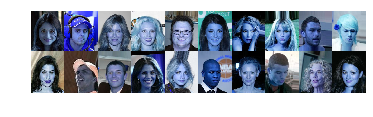

<IPython.core.display.Javascript object>

In [0]:
#@title Samples of the Dataset {display-mode: "form"}
imshowGrid([cv2.imread(appdir(DATA_PATH, f)) for f in listdir(DATA_PATH)[:20]], (2, 10), False)
js_code = '''
code_show=true;
'''
display.display(IPython.display.Javascript(js_code))

In [0]:
ANNOTATIONS_PATH = '/gdrive/My Drive/Anno'

FACIAL_KEYPOINTS_PATH = '/gdrive/My Drive/Anno/list_landmarks_align_celeba.txt'
ATTR_PATH = '/gdrive/My Drive/Anno/list_attr_celeba.txt'

at, kp = None, None
with open(FACIAL_KEYPOINTS_PATH, mode='r') as f:     
    kp = pd.read_csv( StringIO("\t".join(['file','lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y', 'nose_x',
       'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x', 'rightmouth_y']) + "\n"+ "\n".join(['\t'.join([t for t in l.split(' ') if len(t) > 0]) for l in f.readlines()[2:]])), sep="\t")

with open(ATTR_PATH, mode='r') as f:     
    at = pd.read_csv( StringIO("\t".join(['file', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young']) + "\n" + "\n".join(['\t'.join([t for t in l.split(' ') if len(t) > 0]) for l in f.readlines()[2:]])), sep="\t")

    
df = kp.set_index('file').join(at.set_index('file'))

df.reset_index(inplace=True)
df.file = df.file.apply(lambda x: appdir(DATA_PATH, x))

In [0]:
BOUNDING_BOX_LABALES = ['bd_x', 'bd_y', 'bd_w5', 'bd_h4']

df['bd_w5'] = (abs(df.righteye_x - df.lefteye_x) / 2 * 3.99).astype(np.int32)
df['bd_h4'] = (abs((df.lefteye_y - df.leftmouth_y) / 2 + (df.righteye_y - df.rightmouth_y) / 2) / 2 * 4.15).astype(np.int32)

df['bd_x'] = abs(abs(df.righteye_x + df.lefteye_x) / 2 - df['bd_w5'] / 2).astype(np.int32)
df['bd_y'] = abs(abs((df.lefteye_y + df.leftmouth_y) / 2 + (df.righteye_y + df.rightmouth_y) / 2.00) / 2.00 - df['bd_h4'] / 1.99).astype(np.int32)

df['drop0'] = abs(1 - df.bd_w5 / df.bd_h4)
df = df[(df.drop0 < 0.139)]
df.reset_index(drop=True, inplace=True)

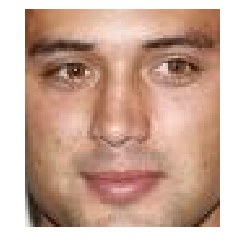

In [0]:
def _imreadFace(index, df, color=cv2.COLOR_RGB2BGR):
    x, y, w, h = df.loc[index][BOUNDING_BOX_LABALES] 
    return cv2.cvtColor(cv2.imread(df.loc[index].file), cv2.COLOR_RGB2BGR)[y:y + h, x:x + w]

imreadFace = lambda i:_imreadFace(i, df)
plt.imshow(imreadFace(1))
plt.axis('off')
plt.show()

In [0]:
import keras
from keras import layers, optimizers, activations, models
from keras import backend as K
from keras import callbacks, constraints, initializers
from keras import losses, metrics
from keras.preprocessing import utils
from keras.preprocessing.image import ImageDataGenerator

TARGET_SHAPE = (128, 128)

Using TensorFlow backend.


In [0]:
NOISE_SIZE = 128

genorator = models.Sequential()

genorator.add(layers.Dense(units=int(4 * 4 * 256), input_shape=(NOISE_SIZE,), use_bias=False, kernel_initializer='random_uniform'))
genorator.add(layers.Reshape((2, 2, 1024)))
genorator.add(layers.BatchNormalization(momentum=0.85))
genorator.add(layers.LeakyReLU(alpha=0.35))
genorator.add(layers.Dropout(0.25))

genorator.add(layers.Convolution2D(filters=1024, padding='same', strides=(1, 1),
                                   kernel_size=(1, 1), use_bias=False, kernel_initializer='random_uniform'))
genorator.add(layers.BatchNormalization(momentum=0.85))
genorator.add(layers.LeakyReLU(alpha=0.2))
genorator.add(layers.Dropout(0.35))

genorator.add(layers.UpSampling2D(interpolation='bilinear'))

genorator.add(layers.Convolution2D(filters=512, padding='same', strides=(1, 1),
                                   kernel_size=(3, 3), use_bias=False, kernel_initializer='random_uniform'))
genorator.add(layers.BatchNormalization(momentum=0.85))
genorator.add(layers.LeakyReLU(alpha=0.2))
genorator.add(layers.Dropout(0.45))

genorator.add(layers.UpSampling2D(interpolation='bilinear'))

genorator.add(layers.Convolution2D(filters=256, padding='same', strides=(1, 1),
                                   kernel_size=(3, 3), use_bias=False, kernel_initializer='random_uniform'))
genorator.add(layers.BatchNormalization(momentum=0.9))
genorator.add(layers.LeakyReLU(alpha=0.2))
genorator.add(layers.Dropout(0.35))

genorator.add(layers.UpSampling2D(interpolation='bilinear'))

genorator.add(layers.Convolution2D(filters=128, padding='same', strides=(1, 1),
                                   kernel_size=(3, 3), use_bias=False, kernel_initializer='random_uniform'))
genorator.add(layers.BatchNormalization(momentum=0.9))
genorator.add(layers.LeakyReLU(alpha=0.2))
genorator.add(layers.Dropout(0.25))

genorator.add(layers.UpSampling2D(interpolation='bilinear'))

genorator.add(layers.Convolution2D(filters=64, padding='same', strides=(1, 1),
                                   kernel_size=(3, 3), use_bias=False, kernel_initializer='random_uniform'))
genorator.add(layers.BatchNormalization(momentum=0.9))
genorator.add(layers.LeakyReLU(alpha=0.2))
genorator.add(layers.Dropout(0.15))

genorator.add(layers.UpSampling2D(interpolation='bilinear'))

genorator.add(layers.Convolution2D(filters=48, padding='same', strides=(1, 1),
                                   kernel_size=(3, 3), use_bias=False, kernel_initializer='random_uniform'))
genorator.add(layers.BatchNormalization(momentum=0.9))
genorator.add(layers.LeakyReLU(alpha=0.2))
genorator.add(layers.Dropout(0.15))

genorator.add(layers.UpSampling2D())

genorator.add(layers.Convolution2D(filters=3, padding='same', strides=(1, 1),
                                   kernel_size=(3, 3)))
genorator.add(layers.Activation('sigmoid'))

genorator.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              524288    
_________________________________________________________________
reshape_1 (Reshape)          (None, 2, 2, 1024)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 1024)        4096      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2, 2, 1024)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 1024)        0         
_________________________________________________________________
conv2d_1 (Conv2D)    

In [0]:
discriminator = models.Sequential()

discriminator.add(layers.Convolution2D(filters=64, padding='same', use_bias=False,
                                       kernel_size=(7, 7), strides=(3, 3), activation=None, input_shape=(TARGET_SHAPE[0], TARGET_SHAPE[1], 3,), kernel_initializer='random_uniform'))
discriminator.add(layers.LeakyReLU(alpha=0.15))
discriminator.add(layers.Dropout(0.15))

discriminator.add(layers.Convolution2D(filters=128, padding='same',
                                       kernel_size=(7, 7), strides=(3, 3), activation=None, kernel_initializer='random_uniform'))
discriminator.add(layers.LeakyReLU(alpha=0.20))
discriminator.add(layers.Dropout(0.15))

discriminator.add(layers.Convolution2D(filters=256, kernel_size=(3, 3),
                                       strides=(2, 2), activation=None, kernel_initializer='random_uniform'))
discriminator.add(layers.LeakyReLU(alpha=0.25))
discriminator.add(layers.Dropout(0.15))

discriminator.add(layers.Convolution2D(filters=512, kernel_size=(3, 3),
                                       strides=(1, 1), activation=None, kernel_initializer='random_uniform'))
discriminator.add(layers.LeakyReLU(alpha=0.35))
discriminator.add(layers.Dropout(0.15))

discriminator.add(layers.Convolution2D(filters=1024, kernel_size=(3, 3),
                                       strides=(1, 1), activation=None, kernel_initializer='random_uniform'))
discriminator.add(layers.LeakyReLU(alpha=0.35))
discriminator.add(layers.Dropout(0.15))

discriminator.add(layers.Convolution2D(filters=2048, kernel_size=(3, 3),
                                       strides=(1, 1), activation=None, kernel_initializer='random_uniform'))
discriminator.add(layers.LeakyReLU(alpha=0.25))

discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(units=1, activation='sigmoid'))

discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 43, 43, 64)        9408      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 43, 43, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       401536    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 256)         295168    
__________

In [0]:
def appendModel(model, modInput):    
    t_model = modInput
    for layer in model.layers:
        t_model = layer(t_model)
    return t_model
   

t_sample, t_fake, t_noise = [
    layers.Input((TARGET_SHAPE[0], TARGET_SHAPE[1], 3)),
    layers.Input((TARGET_SHAPE[0], TARGET_SHAPE[1], 3)),
    layers.Input((NOISE_SIZE,))
]

lr_opt = 4 * 1e-5
optimzer = optimizers.Adam(lr=lr_opt)
genMod = models.Model(inputs=[t_noise], outputs=[appendModel(genorator, t_noise)])

disMod = models.Model(inputs=[t_sample],outputs=[appendModel(discriminator, t_sample)])
disMod.compile(optimizer=optimzer, loss='binary_crossentropy', metrics=['accuracy'])

disMod.trainable = False

comMod =  models.Model(inputs=[t_noise],
                       outputs=[
                           disMod(genMod(t_noise))
                       ])

comMod.compile(optimizer=optimzer, loss=['binary_crossentropy'], loss_weights=[1], metrics=['accuracy'])

In [0]:
comMod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128)               0         
_________________________________________________________________
model_1 (Model)              (None, 128, 128, 3)       7880915   
_________________________________________________________________
model_2 (Model)              (None, 1)                 25484353  
Total params: 33,365,268
Trainable params: 7,874,803
Non-trainable params: 25,490,465
_________________________________________________________________


In [0]:
disMod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 43, 43, 64)        9408      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 43, 43, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       401536    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
comMod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128)               0         
_________________________________________________________________
model_1 (Model)              (None, 128, 128, 3)       7880915   
_________________________________________________________________
model_2 (Model)              (None, 1)                 25484353  
Total params: 33,365,268
Trainable params: 7,874,803
Non-trainable params: 25,490,465
_________________________________________________________________


In [0]:
#@title Continue Trainning ? { display-mode: "both" }
t_continue = False #@param {type:"boolean"}

if t_continue:
    genMod = keras.models.load_model(filepath='/gdrive/My Drive/Senior/gen.h5')
    disMod = keras.models.load_model(filepath='/gdrive/My Drive/Senior/dis.h5')
    comMod = keras.models.load_model(filepath='/gdrive/My Drive/Senior/com.h5')

In [0]:
# from IPython.display import display, clear_output
%matplotlib inline

from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import spline
from sklearn.model_selection import train_test_split

losses = [[], [], []]

df.reset_index(drop=True, inplace=True)

EPOCHS = 11
MIN_EPOCHS_COUNT = 512
MIN_BATCH_SIZE = 8

STEPS = 2

GEN_TRAIN_SIZE = int(MIN_BATCH_SIZE / 2)
DIS_DROP_PROB = 0.00

SAMPLES_COUNT = len(df)

set_lr = lambda lr: K.set_value(optimzer.lr, lr)

y_true = np.ones((int(MIN_BATCH_SIZE / 2), 1), dtype=np.float32)
y_false = np.zeros((int(MIN_BATCH_SIZE / 2), 1), dtype=np.float32)
g_train = np.ones((GEN_TRAIN_SIZE, 1), dtype=np.float32)


def sampleDistrubtion(data_source=df, dsize=MIN_BATCH_SIZE):
    idx = np.random.randint(0, SAMPLES_COUNT, dsize).tolist()
    sd = np.array([cv2.resize(imreadFace(i), dsize=(TARGET_SHAPE[0], TARGET_SHAPE[1])) for i in idx], dtype=np.float32)
    return (sd - sd.min()) / (sd.max() - sd.min()), y_true


def sampleNoise(dsize=MIN_BATCH_SIZE):
    return np.array([np.random.uniform(-1, 1, NOISE_SIZE) for _ in range(dsize)], dtype=np.float32)


MemoX, ValidY = sampleDistrubtion(df, int(MIN_EPOCHS_COUNT * MIN_BATCH_SIZE / 2 * STEPS))

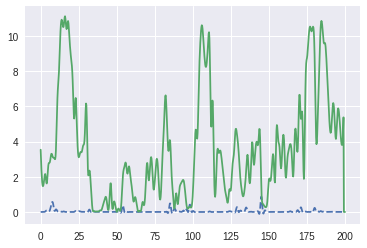

step :160 WAITING_FLAG:False
d_fake_loss :0.009524756111204624
d_valid_loss :0.0009263861575163901
d_loss 0.009330513188615441 g_loss 5.3796263
FINISHD : 4088
lr : 3.500000000000002e-05


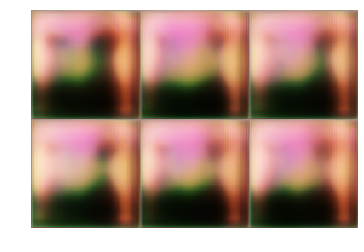

In [0]:
from threading import Thread

WAITING_FLAG = False


def getBatch():
    MemoX, ValidY = sampleDistrubtion(df, int(MIN_EPOCHS_COUNT * MIN_BATCH_SIZE / 2 * STEPS))
    results[0] = [MemoX, ValidY]
    

batchWorker = Thread(target=getBatch)

results = [None]

t_counter = 0
t_total, cum_total = 0, 0
for MAJOR_EPOCHS in range(EPOCHS):
    if t_counter >= MIN_EPOCHS_COUNT * MIN_BATCH_SIZE * STEPS / 4:
        WAITING_FLAG = True
        if not batchWorker.isAlive():
            batchWorker = Thread(target=getBatch)
            batchWorker.start()
    
    if WAITING_FLAG is True:
        t_counter = 0
        if not batchWorker.isAlive():
            MemoX, ValidY = results[0]
            results[0], WAITING_FLAG = None, False
            K.set_value(optimzer.lr, max([lr_opt - 1e-6, 1e-5]))
            lr_opt = max([lr_opt - 1e-6, 1e-5])
    
    if t_total > 7.5 * 1e2:
        cum_total = cum_total + t_total
        t_total = 0
       
        K.set_value(optimzer.lr,max([lr_opt - 1e-6, 1e-6]))
        lr_opt = max([lr_opt - 1e-6, 1e-6])
            
    for min_epoch in range(1, MIN_EPOCHS_COUNT):
        d_loss = 0
        for step in range(STEPS):
            t_total += 1
            
            Pz = sampleNoise(int(MIN_BATCH_SIZE / 2))
            FakeX, FakeY  = genMod.predict([Pz]), y_false           
            
            ValidX =  MemoX[t_counter:t_counter + int(MIN_BATCH_SIZE / 2)]
            t_counter = t_counter +  int(MIN_BATCH_SIZE / 4)
            
            d_fake_loss = disMod.evaluate(FakeX, FakeY, verbose=0)[0]
            d_valid_loss = disMod.evaluate(ValidX, ValidY, verbose=0)[0]
            
            x_train, _, y_train, _ = train_test_split(np.append(FakeX, ValidX, axis=0),
                                                      np.append(FakeY, ValidY, axis=0),
                                                      test_size=DIS_DROP_PROB)
            
            d_loss += disMod.train_on_batch([x_train], [y_train])[0] / float(STEPS)
            
                    
        Pz = sampleNoise(GEN_TRAIN_SIZE)
        g_loss = comMod.train_on_batch([Pz], [g_train])[0]
        if len(losses[0]) > 0:
            if abs((d_fake_loss + d_valid_loss) / 2 - losses[1][-1]) < 1e-4 and abs(g_loss - losses[2][-1]) < 1e-4:
                K.set_value(optimzer.lr,max([lr_opt * 0.5, 1e-6]))
                lr_opt = max([lr_opt * 0.5, 1e-6])
            
        losses[1].append((d_fake_loss + d_valid_loss) / 2)
        losses[2].append(g_loss)
        
        if min_epoch % 64 == 0:
            genMod.save(filepath='/gdrive/My Drive/Senior/gen.h5')
            disMod.save(filepath='/gdrive/My Drive/Senior/dis.h5', include_optimizer=True, overwrite=True)
            comMod.save(filepath='/gdrive/My Drive/Senior/com.h5', include_optimizer=True, overwrite=True)
        
        if min_epoch % 32 == 0:
            if len(losses[1]) > 200:
                with open('/gdrive/My Drive/Senior/loss.cvs', mode='w') as f:
                    f.write(pd.DataFrame({'d_fake_loss':losses[1], 'g_loss': losses[2], 'lr': [lr_opt for _ in range(len(losses[2]))]}).to_csv(index=False))                    
                losses = [loss[-200:] for loss in losses]
            
            display.clear_output()
            
            x_smooth = np.linspace(0, len(losses[1]), len(losses[2]) * 4)
            y_smooth = spline(np.arange(0, len(losses[1]), step=1), losses[1], x_smooth)
            
            plt.plot(x_smooth, y_smooth, '--')

            x_smooth = np.linspace(0, len(losses[2]), len(losses[2]) * 4)
            y_smooth = spline(np.arange(0, len(losses[2]), step=1), losses[2], x_smooth)
            
            plt.plot(x_smooth, y_smooth, '-')
            plt.show()
            
            display.display()

            print('step :' + str(min_epoch) + ' WAITING_FLAG:' + str(WAITING_FLAG))
            display.display()
            print('d_fake_loss :' + str(d_fake_loss))
            display.display()
            print('d_valid_loss :' + str(d_valid_loss))
            display.display()
            
            print('d_loss', d_loss, 'g_loss', g_loss, end='\n')
            print('FINISHD : ' + str(cum_total))
            display.display()
            
            print('lr : ' + str(lr_opt))
            display.display()
            
            canvs = genMod.predict(sampleNoise(dsize=6))
            canvs = ((canvs) * 255).astype(np.uint8)
            
            canvs = imshowGrid(canvs, (2, 3), True)
            logImgs(canvs)